# Early Diagnosis of Depression Using Machine Learning

## 1. Introduction

### 1.1 Problem Statement
Depression is a mental disorder that negatively affects the patient's behaviors, actions, and thoughts. It leads to a loss of interest, appetite, activity, sleep problems, and fatigue. Moreover, depression causes physical symptoms and can exacerbate certain illnesses or conditions. It is often a complication of chronic diseases such as diabetes, hypertension, cancer, stroke, and heart attack. According to the World Health Organization (WHO), 3.8% of the world's population is affected by depression, including 5% of adults. Given the significant impact of depression on individuals and public health, early diagnosis is crucial. Therefore, this project aimed to implement a machine learning model for the early diagnosis of depression.

### 1.2 Objectives
The primary objective of this project is to develop a machine learning model that accurately predicts whether an individual is suffering from depression based on their responses to a questionnaire. The specific goals are:
    
    1. To perform exploratory data analysis (EDA) to understand the distribution and relationships within the dataset.
    2. To preprocess the data by handling missing values, encoding categorical variables, and scaling features.
    3. To build and evaluate different machine learning models to determine the most effective one for predicting depression.
    4. To interpret the model's predictions and identify the most important features contributing to the prediction of depression.
    5. To provide insights and recommendations based on the model's findings to support early diagnosis and intervention strategies.

## 2. Data Understanding

### 2.1 Dataset Description
This project utilized a public online dataset available at Zindi, provided by the Busara Center for Behavioral Economics. The data is a collection of survey responses related to mental health in East Africa. It includes information about respondents’ demographic characteristics, socio-economic status, and mental health status.

The dataset consists of 1143 records with 75 attributes, including the target class. The target variable is the participant's mental health status, a binary variable indicating whether the participant has a mental health condition or not. Out of 1143 participants, 193 have a mental health condition.

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import * 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [270]:
# Load data
df = pd.read_csv('depression.csv')
df.head()

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,4.0,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.50,1.50,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,6.0,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.75,1.75,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


In [23]:
df.shape

(1143, 75)

### 2.2 Exploratory Data Analysis (EDA)

#### Basic Statistics and Structure

In [24]:
# Basic statistics
df.describe()

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,809.000000,...,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,715.927384,76.409449,0.916885,34.537270,0.772528,2.860017,4.869641,8.735783,2.018373,4.906057,...,0.015748,0.553462,0.066492,3.564576,3.011114,0.188976,2.269096,0.097988,0.168854,3.295713
std,415.694525,66.788138,0.276176,13.742107,0.419383,1.846946,2.121852,2.867202,2.016702,2.099287,...,0.124554,6.489140,0.249249,24.950902,25.840639,0.391661,19.676268,0.297428,0.374787,1.684910
min,1.000000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,-160.153700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,351.500000,23.000000,1.000000,24.000000,1.000000,2.000000,3.000000,8.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,717.000000,57.000000,1.000000,30.000000,1.000000,3.000000,5.000000,9.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1078.500000,105.500000,1.000000,41.000000,1.000000,4.000000,6.000000,10.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,1429.000000,292.000000,1.000000,91.000000,1.000000,10.000000,12.000000,19.000000,10.000000,12.000000,...,1.000000,160.153700,1.000000,352.338130,352.338130,1.000000,488.468780,1.000000,1.000000,6.000000


In [25]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 75 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surveyid                 1143 non-null   int64  
 1   village                  1143 non-null   int64  
 2   survey_date              1143 non-null   object 
 3   femaleres                1143 non-null   int64  
 4   age                      1143 non-null   float64
 5   married                  1143 non-null   int64  
 6   children                 1143 non-null   int64  
 7   hhsize                   1143 non-null   int64  
 8   edu                      1143 non-null   int64  
 9   hh_children              1143 non-null   int64  
 10  hh_totalmembers          809 non-null    float64
 11  cons_nondurable          1143 non-null   float64
 12  asset_livestock          1143 non-null   float64
 13  asset_durable            1143 non-null   float64
 14  asset_phone             

#### Missing Values

In [26]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

hh_totalmembers             334
cons_alcohol                 43
cons_tobacco                 20
cons_med_children           419
fs_chskipm_often            416
fs_chwholed_often           416
fs_meat                     334
fs_enoughtom                334
fs_sleephun                 334
med_expenses_hh_ep          693
med_expenses_sp_ep          878
med_expenses_child_ep       600
med_portion_sickinjured     334
med_port_sick_child         416
med_afford_port             423
med_sickdays_hhave          334
med_healthconsult           423
med_u5_deaths              1084
ed_expenses                 463
ed_expenses_perkid          463
ed_schoolattend             463
ed_sch_missedpc             467
ed_work_act_pc              571
dtype: int64

#### Target Variable Distribution

/Users/rana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


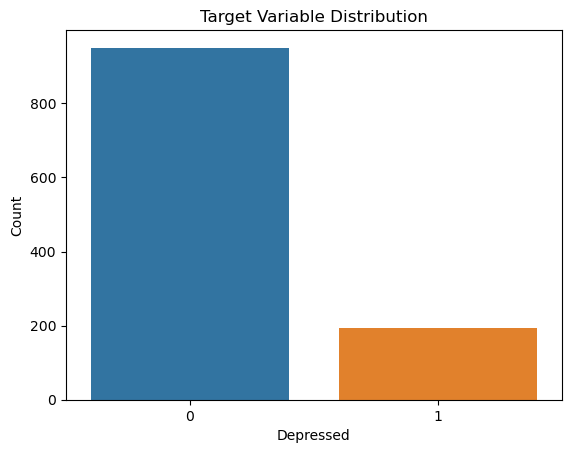

In [27]:
# Target variable distribution
sns.countplot(df['depressed'])
plt.title('Target Variable Distribution')
plt.xlabel('Depressed')
plt.ylabel('Count')
plt.show()

The bar chart shows the distribution of the target variable depressed:

Not Depressed (0): ~900 participants
Depressed (1): ~200 participants

Key Observation
Class Imbalance: The dataset has more participants who are not depressed compared to those who are depressed. This imbalance needs to be addressed in model building to ensure accurate predictions.

#### Feature Distribution
Let's visualize the distribution of some key features:

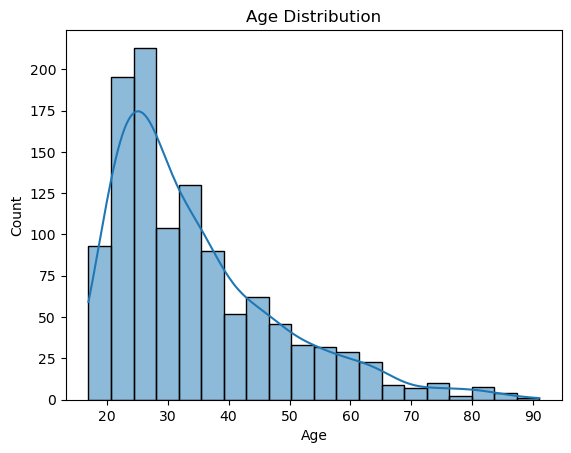

In [28]:
# Age distribution
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### Age Distribution Explanation

The histogram shows the age distribution of participants in the dataset:

- **Peak Age Group**: Most participants are in their early 20s, with the highest count around age 23.
- **Age Range**: The ages range from 20 to around 90, but the majority are under 50.

### Key Observation

- **Young Population**: The dataset is skewed towards younger individuals, which may influence the analysis and model predictions related to depression.

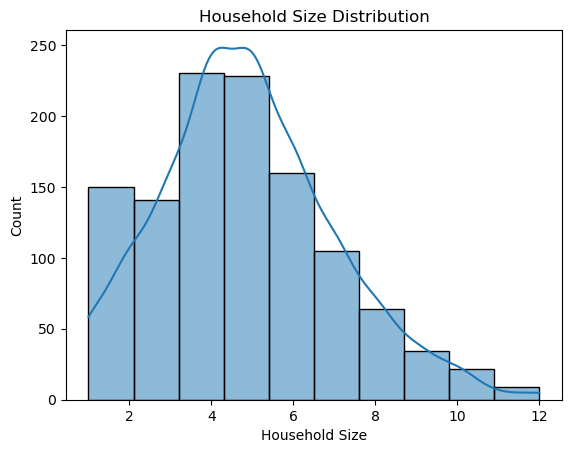

In [29]:
# Household size distribution
sns.histplot(df['hhsize'], bins=10, kde=True)
plt.title('Household Size Distribution')
plt.xlabel('Household Size')
plt.ylabel('Count')
plt.show()

### Household Size Distribution Explanation

The histogram shows the distribution of household sizes among participants in the dataset:

- **Peak Household Size**: Most households have 4 to 5 members, with the highest count around 4 members.
- **Household Size Range**: Household sizes range from 1 to 12 members, but the majority are between 2 and 8 members.

### Key Observation

- **Common Household Size**: The dataset is centered around households with 4 to 5 members, which may influence how household size relates to depression in the analysis.

/Users/rana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


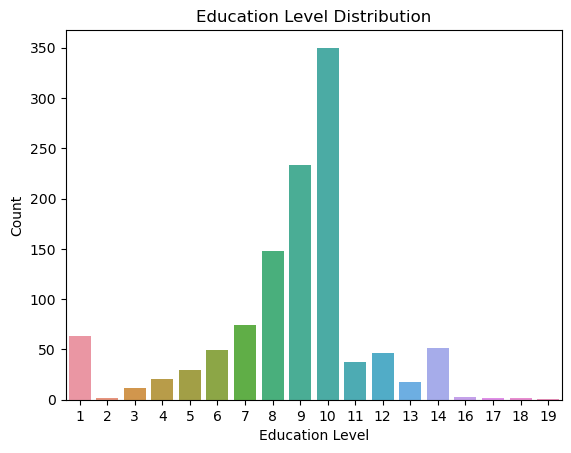

In [30]:
# Education level distribution
sns.countplot(df['edu'])
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

### Education Level Distribution Explanation

The bar chart shows the distribution of education levels among participants in the dataset:

- **Most Common Education Level**: The highest count is at education level 10, with more than 350 participants.
- **Range of Education Levels**: Education levels range from 1 to 19, but the majority of participants are clustered around levels 6 to 12.

### Key Observation

- **Peak at Level 10**: Education level 10 is the most common among participants, significantly higher than other levels, which may influence how education relates to depression in the analysis.

#### Relationship Between Features and Target Variable
Let's examine the relationship between some key features and the target variable `depressed`.

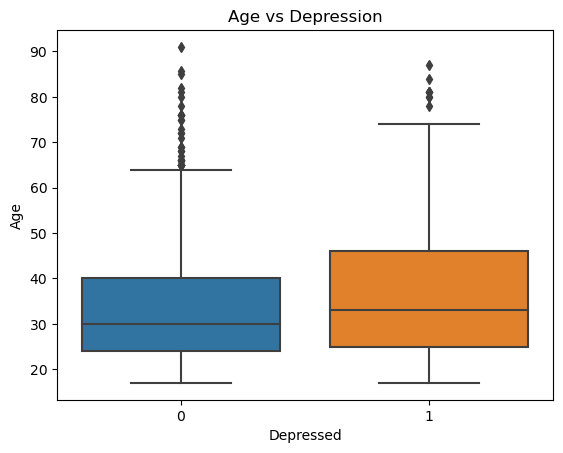

In [31]:
# Relationship between age and depression
sns.boxplot(x='depressed', y='age', data=df)
plt.title('Age vs Depression')
plt.xlabel('Depressed')
plt.ylabel('Age')
plt.show()

### Age vs Depression Explanation

The boxplot compares the age distribution between participants who are not depressed (0) and those who are depressed (1):

- **Non-Depressed (0)**: The median age is around 30 years, with most participants aged between 20 and 40. There are several outliers above 60.
- **Depressed (1)**: The median age is slightly higher, around 35 years, with most participants aged between 25 and 45. There are also outliers above 60.

### Key Observation

- **Age Difference**: Participants with depression tend to be slightly older than those without, with a wider age range. This suggests age might play a role in the likelihood of experiencing depression.

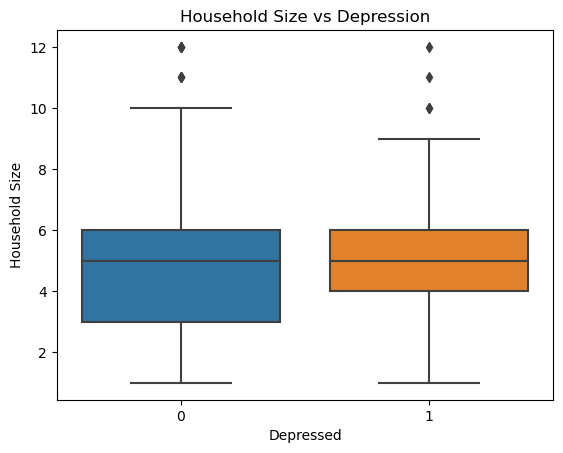

In [32]:
# Relationship between household size and depression
sns.boxplot(x='depressed', y='hhsize', data=df)
plt.title('Household Size vs Depression')
plt.xlabel('Depressed')
plt.ylabel('Household Size')
plt.show()

### Household Size vs Depression Explanation

The boxplot compares the household size distribution between participants who are not depressed (0) and those who are depressed (1):

- **Non-Depressed (0)**: The median household size is 5 members, with most households having between 4 and 6 members. There are outliers with household sizes above 10.
- **Depressed (1)**: The median household size is slightly smaller, around 4 members, with most households having between 4 and 6 members. There are outliers with household sizes above 10.

### Key Observation

- **Similar Household Sizes**: Both groups have similar household size distributions, though non-depressed participants tend to have slightly larger households on average. Household size appears to have a minor impact on depression status.

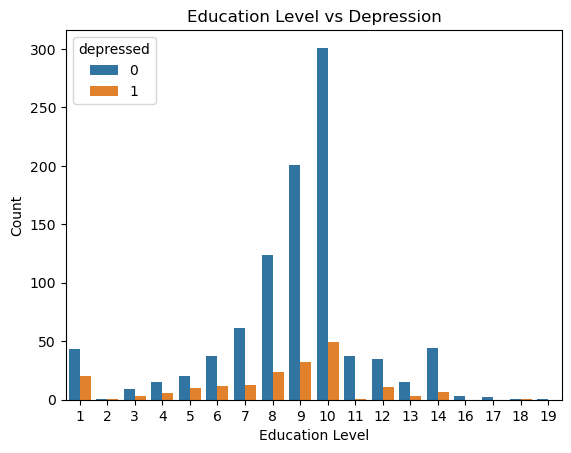

In [33]:
# Relationship between education level and depression
sns.countplot(x='edu', hue='depressed', data=df)
plt.title('Education Level vs Depression')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

### Education Level vs Depression Explanation

The bar chart compares the education level distribution between participants who are not depressed (0) and those who are depressed (1):

- **Most Common Education Level**: Education level 10 has the highest count for both non-depressed and depressed participants, with a significantly larger number of non-depressed participants.
- **Depression Distribution**: While most education levels have a higher count of non-depressed participants, there is a noticeable presence of depressed participants across various education levels, especially around levels 8, 9, and 10.

### Key Observation

- **High Counts in Mid Education Levels**: Education levels around 8, 9, and 10 show a substantial number of participants, both depressed and non-depressed. The distribution indicates that education level may have an influence on depression, but other factors likely play a significant role as well.

## 3. Data Preprocessing



### 3.1. Handling Missing Values: 

#### Dropping unnessary columns

In [271]:
df.drop(['surveyid', 'village', 'survey_date', 'day_of_week'], axis=1, inplace = True)
df.shape

(1143, 71)

#### Dropping columns with missing values >= 25%:

In [272]:
df.drop(columns=df.columns[(df.isnull().sum()/1143)>=0.25], inplace = True)
df.shape

(1143, 50)

#### Drop any rows with missing values >= 2%

In [273]:
df.drop(df[df.isnull().sum(axis=1)/50>=0.02].index, inplace=True) 
print(df.shape)

(1094, 50)


In [274]:
missing_values=df.isna().sum()
missing_values[missing_values>0]

Series([], dtype: int64)

### 3.2. Normalization - Using Robust Scaler

In [275]:
pd.reset_option('display.max_rows')
pd.set_option('display.max_columns', None)

In [277]:
df_other

,femaleres,married,children,hh_children,asset_niceroof,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,med_vacc_newborns,med_child_check,labor_primary,given_mpesa,received_mpesa,saved_mpesa,early_survey,depressed
0,1,1,4,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
1,1,1,3,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1
2,1,1,3,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3,1,1,2,2,0,0,1,0,1,0,1,1,0,0,0,1,0,0
4,0,0,4,4,0,1,0,0,0,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1,0,4,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
1139,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
1140,1,1,5,5,0,0,1,0,1,0,1,1,0,0,0,0,0,0
1141,1,0,4,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [276]:
df_other=df.copy()
df_other=df[['femaleres', 'married', 'children', 
             'hh_children', 'asset_niceroof', 'ent_wagelabor', 
             'ent_ownfarm', 'ent_business', 'ent_nonagbusiness',
            'ent_employees', 'med_vacc_newborns', 'med_child_check',
            'labor_primary', 'given_mpesa', 'received_mpesa', 
            'saved_mpesa', 'early_survey', 'depressed']]

print(df_other.shape)

(1094, 18)


In [42]:
df_norm=df.copy()
df_norm.drop(['femaleres', 'married', 'children', 
             'hh_children', 'asset_niceroof', 'ent_wagelabor', 
             'ent_ownfarm', 'ent_business', 'ent_nonagbusiness',
            'ent_employees', 'med_vacc_newborns', 'med_child_check',
            'labor_primary', 'given_mpesa', 'received_mpesa', 
            'saved_mpesa', 'early_survey', 'depressed'], axis=1, inplace = True)

print(df_norm.shape)

(1094, 32)


In [45]:
scaler = preprocessing.RobustScaler()
names = df_norm.columns
d = scaler.fit_transform(df_norm)
df_norm = pd.DataFrame(d, columns=names)
df_norm.head()

,age,hhsize,edu,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_ed,cons_social,cons_other,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,wage_expenditures,durable_investment,nondurable_investment,amount_given_mpesa,amount_received_mpesa,net_mpesa,amount_saved_mpesa
0,-0.159375,0.333333,0.5,-0.558444,-0.165365,-0.549204,0.00,0.000000,0.000000,-0.549663,-0.327143,0.0,0.0,0.000000,-0.170940,-0.326981,-0.440219,0.000000,0.0,-0.333333,-0.215509,0.000000,-0.114254,-0.333333,0.0,0.0,-0.462567,-0.200129,0.0,0.000000,0.000000,0.000000
1,-0.471875,0.000000,-0.5,-0.558444,-0.165365,-0.549204,0.00,0.000000,0.000000,-0.549663,-0.327143,0.0,0.0,0.000000,-0.170940,-0.326981,-0.440219,0.000000,0.0,-0.333333,-0.215509,0.000000,-0.114254,-0.333333,0.0,0.0,-0.462567,-0.200129,0.0,4.804611,4.804611,0.000000
2,-0.534375,0.000000,0.0,-0.558444,-0.165365,-0.549204,0.00,0.000000,0.000000,-0.549663,-0.327143,0.0,0.0,0.000000,-0.170940,-0.326981,-0.440219,0.000000,0.0,-0.333333,-0.215509,0.000000,-0.114254,-0.333333,0.0,0.0,-0.462567,-0.200129,0.0,8.007685,8.007685,0.000000
3,-0.221875,-0.333333,0.5,1.459448,5.106204,0.340810,0.75,49.647648,0.000000,1.576146,3.572857,0.0,0.0,4.163996,0.547008,10.287444,0.992446,32.030739,0.0,3.642857,0.649606,6.621438,1.673576,-0.333333,0.0,0.0,1.491691,3.003474,0.0,0.000000,0.000000,1.249199
4,1.778125,0.333333,0.5,0.819398,-0.082682,0.234805,0.60,0.000000,0.338983,0.722197,-0.234000,0.0,0.0,0.800768,0.797721,1.831523,1.983329,0.000000,0.0,-0.238095,0.740940,0.000000,0.092915,-0.333333,0.0,0.0,0.042266,0.000824,0.0,0.000000,0.000000,0.000000


In [46]:
df_norm.shape

(1094, 32)

In [47]:
df=pd.concat([df_norm.reset_index(drop=True), df_other.reset_index(drop=True)], axis=1)

In [48]:
df.shape

(1094, 50)

## Save the first preprocessed data:

In [50]:
df.to_csv("Preprocessed_Depression_Dataset_25%cols_2%rows_50Features.csv", index=False)

### 3.3. SelectKBest Features
For selecting the most important features, we will use the wrapping technique during the preprocessing phase.

In [146]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import *

import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.metrics import *
import random
from random import randint
import warnings
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 
warnings.filterwarnings('ignore')
kf = StratifiedKFold(n_splits=10)
from imblearn.under_sampling import NearMiss

#You have to define it here only
rs=123
%matplotlib inline

In [241]:
df=pd.read_csv('Preprocessed_Depression_Dataset_25%cols_2%rows_50Features.csv')

In [242]:
df.shape

(1094, 50)

In [243]:
X=df.drop('depressed', axis=1)
Y=df['depressed']

print('X:',X.shape)
print('Y:',Y.shape)

print('Value counts of classes:\n', Y.value_counts())

X: (1094, 49)
Y: (1094,)
Value counts of classes:
 0    911
1    183
Name: depressed, dtype: int64


In [244]:
def model_evaluation(model, Y_predicted, X_train, Y_train, Y_test):
    """
    Evaluates the performance of a machine learning model using various metrics.

    Parameters:
    model (object): The trained machine learning model.
    Y_predicted (array-like): The predicted labels for the test set.
    X_train (array-like): The training set features.
    Y_train (array-like): The training set labels.
    Y_test (array-like): The true labels for the test set.

    Prints:
    * Train score: The accuracy of the model on the training set.
    * Confusion matrix: The confusion matrix for the test set predictions.
    * Accuracy: The accuracy of the model on the test set.
    * F1: The F1 score of the model on the test set.
    * Precision: The precision of the model on the test set.
    * Recall: The recall of the model on the test set.
    * ROC_AUC: The ROC AUC score of the model on the test set.
    """
    # Print the training score of the model
    print('* Train score: %0.2f' % (model.score(X_train, Y_train) * 100))
    
    # Print the confusion matrix for the test set predictions
    print('* Confusion matrix: \n', confusion_matrix(Y_test, Y_predicted))
    
    # Print the accuracy of the model
    print('* Accuracy: %0.2f' % (accuracy_score(Y_test, Y_predicted) * 100))
    
    # Print the ROC AUC score of the model
    print('* ROC_AUC: %0.2f' % (roc_auc_score(Y_test, Y_predicted) * 100))

In [252]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=rs)

In [253]:
Y_train.value_counts()

0    678
1    142
Name: depressed, dtype: int64

In [254]:
Y_test.value_counts()

0    233
1     41
Name: depressed, dtype: int64

In [255]:
for i in range(1,50):
    print('*****',i,'******')
    FS = SelectKBest(score_func=f_classif, k=i) 
    FS.fit(X_train, Y_train)
    
    X_train_FS = FS.transform(X_train)
    X_test_FS = FS.transform(X_test)
    
    XGB_model=XGBClassifier(random_state=rs)

    XGB_model.fit(X_train_FS,Y_train)

    Y_predicted_XGB=XGB_model.predict(X_test_FS)

    model_evaluation(XGB_model, Y_predicted_XGB, X_train_FS, Y_train, Y_test)
    
    print('-----------------------------------------------------------------')

***** 1 ******
* Train score: 83.05
* Confusion matrix: 
 [[229   4]
 [ 40   1]]
* Accuracy: 83.94
* ROC_AUC: 50.36
-----------------------------------------------------------------
***** 2 ******
* Train score: 83.54
* Confusion matrix: 
 [[227   6]
 [ 38   3]]
* Accuracy: 83.94
* ROC_AUC: 52.37
-----------------------------------------------------------------
***** 3 ******
* Train score: 89.88
* Confusion matrix: 
 [[223  10]
 [ 35   6]]
* Accuracy: 83.58
* ROC_AUC: 55.17
-----------------------------------------------------------------
***** 4 ******
* Train score: 91.10
* Confusion matrix: 
 [[218  15]
 [ 37   4]]
* Accuracy: 81.02
* ROC_AUC: 51.66
-----------------------------------------------------------------
***** 5 ******
* Train score: 90.85
* Confusion matrix: 
 [[218  15]
 [ 37   4]]
* Accuracy: 81.02
* ROC_AUC: 51.66
-----------------------------------------------------------------
***** 6 ******
* Train score: 95.61
* Confusion matrix: 
 [[214  19]
 [ 35   6]]
* Accurac

* Train score: 98.90
* Confusion matrix: 
 [[223  10]
 [ 37   4]]
* Accuracy: 82.85
* ROC_AUC: 52.73
-----------------------------------------------------------------
***** 48 ******
* Train score: 98.90
* Confusion matrix: 
 [[223  10]
 [ 37   4]]
* Accuracy: 82.85
* ROC_AUC: 52.73
-----------------------------------------------------------------
***** 49 ******
* Train score: 98.90
* Confusion matrix: 
 [[223  10]
 [ 37   4]]
* Accuracy: 82.85
* ROC_AUC: 52.73
-----------------------------------------------------------------


### 24 Features:

In [256]:
FS = SelectKBest(score_func=f_classif, k=24) 
FS.fit(X_train, Y_train)    

X_train_FS = FS.transform(X_train)
X_test_FS = FS.transform(X_test)

#XGB model  
print("**************XGB**************")
XGB_model=XGBClassifier(random_state=rs)
XGB_model.fit(X_train_FS,Y_train)
Y_predicted_XGB=XGB_model.predict(X_test_FS)
model_evaluation(XGB_model, Y_predicted_XGB, X_train_FS, Y_train, Y_test)

#Adaboost Model
print("**************AdaBoost**************")
XGB_model=AdaBoostClassifier(random_state=rs)
XGB_model.fit(X_train_FS,Y_train)
Y_predicted_XGB=XGB_model.predict(X_test_FS)
model_evaluation(XGB_model, Y_predicted_XGB, X_train_FS, Y_train, Y_test)

#Extraa Tree Model
print("**************ExtraTree**************")
XGB_model=ExtraTreesClassifier(random_state=rs)
XGB_model.fit(X_train_FS,Y_train)
Y_predicted_XGB=XGB_model.predict(X_test_FS)
model_evaluation(XGB_model, Y_predicted_XGB, X_train_FS, Y_train, Y_test)

**************XGB**************
* Train score: 98.78
* Confusion matrix: 
 [[224   9]
 [ 35   6]]
* Accuracy: 83.94
* ROC_AUC: 55.39
**************AdaBoost**************
* Train score: 85.24
* Confusion matrix: 
 [[220  13]
 [ 39   2]]
* Accuracy: 81.02
* ROC_AUC: 49.65
**************ExtraTree**************
* Train score: 99.39
* Confusion matrix: 
 [[226   7]
 [ 38   3]]
* Accuracy: 83.58
* ROC_AUC: 52.16


In [257]:
selectedfeatures = X_train.columns[(FS.get_support())]
print(selectedfeatures)

Index(['age', 'hhsize', 'edu', 'asset_livestock', 'asset_durable',
       'asset_savings', 'asset_land_owned_total', 'cons_alcohol',
       'cons_tobacco', 'cons_social', 'ent_nonag_flowcost',
       'ent_animalstockrev', 'ent_total_cost', 'fs_adwholed_often',
       'nondurable_investment', 'amount_given_mpesa', 'amount_received_mpesa',
       'net_mpesa', 'married', 'children', 'hh_children', 'ent_nonagbusiness',
       'ent_employees', 'early_survey'],
      dtype='object')


In [258]:
len(selectedfeatures)

24

#### Saving the best 24 features 

In [201]:
df24=df[['age', 'hhsize', 'edu', 'asset_livestock', 'asset_durable',
       'asset_savings', 'asset_land_owned_total', 'cons_alcohol',
       'cons_tobacco', 'cons_social', 'ent_nonag_flowcost',
       'ent_animalstockrev', 'ent_total_cost', 'fs_adwholed_often',
       'nondurable_investment', 'amount_given_mpesa', 'amount_received_mpesa',
       'net_mpesa', 'married', 'children', 'hh_children', 'ent_nonagbusiness',
       'ent_employees', 'early_survey', 'depressed']]

In [202]:
df24.shape

(1094, 25)

In [203]:
df24.to_csv("Preprocessed_Depression_Dataset_24Features.csv", index=False)

## 4. Model Building 

In [264]:
#read the cleaned dataset
df=pd.read_csv("Preprocessed_Depression_Dataset_24Features.csv")
df.shape

(1094, 25)

In [265]:
#Determining the Features and Target Class
X=df.iloc[:,:-1]
Y=df['depressed'] #Specify the class
print("Features shape: ", X.shape)
print("Class shape: ", Y.shape)

#define maximum no. of features:
maxfeature=X.shape[1]

Features shape:  (1094, 24)
Class shape:  (1094,)


### 4.1. Train-Test Split

In [266]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2 ,random_state=rs)

In [218]:
print('Y train: \n', Y_train.value_counts())

Y train: 
 0    728
1    147
Name: depressed, dtype: int64


In [219]:
print('Y test: \n', Y_test.value_counts())

Y test: 
 0    183
1     36
Name: depressed, dtype: int64


### 4.2. Undersampling using NearMiss

In [220]:
nearmiss = NearMiss(version=1, n_neighbors=11)
X_train, Y_train = nearmiss.fit_resample(X_train, Y_train)
print(Y_train.value_counts())

0    147
1    147
Name: depressed, dtype: int64


In [221]:
X_test, Y_test = nearmiss.fit_resample(X_test, Y_test)
print(Y_test.value_counts())

0    36
1    36
Name: depressed, dtype: int64


In [222]:
Y.value_counts()

0    911
1    183
Name: depressed, dtype: int64

### 4.3. Modeling

#### 4.3.1. Support Vector Machine (SVM)

In [223]:
SVM_model=SVC(random_state=rs)

SVM_model.fit(X_train,Y_train)

Y_predicted_SVM=SVM_model.predict(X_test)

model_evaluation(SVM_model, Y_predicted_SVM, X_train, Y_train, Y_test)

* Train score: 73.47
* Confusion matrix: 
 [[36  0]
 [20 16]]
* Accuracy: 72.22
* ROC_AUC: 72.22


#### 4.3.1.1 Hyperparameter Tuning

In [224]:
param2={'C':[1.0, 2, 3, 4, 5, 6, 7],
'gamma': [0.1, 0.01, 0.001, 0.0001,0.0001, 'scale', 'auto'],
'kernel':['rbf', 'sigmoid', 'linear']} 

In [225]:
svm = GridSearchCV(SVM_model, param2, cv=kf)
svm.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(random_state=123),
             param_grid={'C': [1.0, 2, 3, 4, 5, 6, 7],
                         'gamma': [0.1, 0.01, 0.001, 0.0001, 0.0001, 'scale',
                                   'auto'],
                         'kernel': ['rbf', 'sigmoid', 'linear']})

In [226]:
svm_best=svm.best_estimator_
print(svm.best_score_)
print(svm.best_estimator_)

0.8537931034482759
SVC(C=4, gamma=0.1, random_state=123)


In [227]:
SVM_model_OPT=svm_best

SVM_model_OPT.fit(X_train,Y_train)

Y_predicted_SVMOPT=SVM_model_OPT.predict(X_test)

model_evaluation(SVM_model_OPT, Y_predicted_SVMOPT, X_train, Y_train, Y_test)

* Train score: 88.10
* Confusion matrix: 
 [[32  4]
 [ 8 28]]
* Accuracy: 83.33
* ROC_AUC: 83.33


#### 4.3.2.  Decision Tree (DT)

In [228]:
DT_model=DecisionTreeClassifier(random_state=rs)

DT_model.fit(X_train,Y_train)

Y_predicted_DT=DT_model.predict(X_test)

model_evaluation(DT_model, Y_predicted_DT, X_train, Y_train, Y_test)

* Train score: 98.30
* Confusion matrix: 
 [[30  6]
 [ 8 28]]
* Accuracy: 80.56
* ROC_AUC: 80.56


#### 4.3.2.1. Hyperparameter Tuning

In [229]:
param3={'max_features': ['auto', 'sqrt', 'log2', None],
'criterion' :['gini', 'entropy'],
'splitter':['best', 'random'],
'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 18, 20, 23, 25, 27, 30, 31, None]}

In [230]:
dt = GridSearchCV(DT_model, param3, cv=kf)
dt.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15,
                                       18, 20, 23, 25, 27, 30, 31, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'splitter': ['best', 'random']})

In [231]:
dt_best=dt.best_estimator_
print(dt.best_score_)
print(dt.best_estimator_)

0.836551724137931
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       random_state=123)


In [232]:
DT_model_OPT=dt_best

DT_model_OPT.fit(X_train,Y_train)

Y_predicted_DTOPT=DT_model_OPT.predict(X_test)

model_evaluation(DT_model_OPT, Y_predicted_DTOPT, X_train, Y_train, Y_test)

* Train score: 86.05
* Confusion matrix: 
 [[31  5]
 [11 25]]
* Accuracy: 77.78
* ROC_AUC: 77.78


#### 4.3.3.  k-Nearst Neighbor (k-NN)

In [233]:
KNN_model=KNeighborsClassifier()

KNN_model.fit(X_train,Y_train)

Y_predicted_KNN=KNN_model.predict(X_test)

model_evaluation(KNN_model, Y_predicted_KNN, X_train, Y_train, Y_test)

* Train score: 85.37
* Confusion matrix: 
 [[34  2]
 [ 9 27]]
* Accuracy: 84.72
* ROC_AUC: 84.72


#### 4.3.3.1. Hyperparameter Tuning

In [234]:
param4={'n_neighbors':[5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39],
'metric':['minkowski', 'euclidean',' manhattan']}

In [235]:
knn = GridSearchCV(KNN_model, param4, cv=kf)
knn.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', ' manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39]})

In [236]:
knn_best=knn.best_estimator_
print(knn.best_score_)
print(knn.best_estimator_)

0.8301149425287356
KNeighborsClassifier(n_neighbors=7)


In [237]:
KNN_model_OPT=knn_best

KNN_model_OPT.fit(X_train,Y_train)

Y_predicted_KNNOPT=KNN_model_OPT.predict(X_test)

model_evaluation(KNN_model_OPT, Y_predicted_KNNOPT, X_train, Y_train, Y_test)

* Train score: 84.35
* Confusion matrix: 
 [[33  3]
 [10 26]]
* Accuracy: 81.94
* ROC_AUC: 81.94


#### Download the best model

In [240]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(SVM_model_OPT, file)

### Result

This section compares the performance of three different machine learning models: K-Nearest Neighbors (KNN), Decision Tree (DT), and Support Vector Machine (SVM). The results are evaluated based on the training score, confusion matrix, accuracy, and ROC AUC.

The KNN model shows a good performance with an accuracy of 81.94% on the test set. It correctly identified 33 non-depressed and 26 depressed cases, with 13 misclassifications (3 false positives and 10 false negatives). The train score of 84.35% indicates that the model performs well on the training data as well. The ROC AUC score of 81.94% is consistent with the accuracy, indicating a reliable performance.

The DT model has a slightly lower accuracy of 77.78% compared to the KNN model. It correctly predicted 31 non-depressed and 25 depressed cases, with 16 misclassifications (5 false positives and 11 false negatives). The train score of 86.05% suggests the model fits the training data well. The ROC AUC score of 77.78% aligns with the accuracy, indicating a somewhat lower performance compared to KNN and SVM.

The SVM model achieved the highest accuracy of 83.33% on the test set. It correctly identified 32 non-depressed and 28 depressed cases, with 12 misclassifications (4 false positives and 8 false negatives). The train score of 88.10% indicates that the model performs the best on the training data among the three models. The ROC AUC score of 83.33% is the highest, reflecting the model's strong performance in distinguishing between depressed and non-depressed cases.

Among the three models evaluated, the SVM model demonstrates the best performance with the highest accuracy (83.33%) and ROC AUC score (83.33%). The KNN model also performs well with an accuracy of 81.94% and ROC AUC of 81.94%. The DT model, while having a good train score, has the lowest test accuracy (77.78%) and ROC AUC score (77.78%) among the three models. These results suggest that the SVM model is the most effective for predicting depression in this dataset.

#### Reflection
In this project, I have tackled the problem of predicting depression using a dataset from Zindi. The end-to-end solution involved data preprocessing, feature selection, model training, and evaluation. I have evaluated three machine learning models: K-Nearest Neighbors (KNN), Decision Tree (DT), and Support Vector Machine (SVM). The SVM model demonstrated the best performance with an accuracy of 83.33% and an ROC AUC score of 83.33%.

One interesting aspect of this project was handling the class imbalance in the dataset, which significantly influenced model performance. Implementing feature selection using the wrapping technique was also challenging but crucial for improving model accuracy and interpretability.

#### Improvement
For future research, the following improvements can be made:
1. **Advanced Feature Engineering**: Explore more advanced feature engineering techniques to enhance model performance.
2. **Handling Class Imbalance**: Implement resampling methods such as SMOTE or use ensemble methods like Random Forest or XGBoost that handle imbalanced datasets effectively.
3. **Cross-Validation**: Employ cross-validation techniques to ensure model robustness and generalizability.
4. **Hyperparameter Tuning**: Perform more extensive hyperparameter tuning using grid search or random search to optimize model performance.

These improvements can help achieve better accuracy and more reliable predictions in future experiments.